# Árbol de Decisión
>En este módulo vamos a mostrar un ejemplo de árbol aplicado a clasificación. 
Mostraremos el uso de _train_test_split_ para dividir el conjunto de entrenamiento y testeo y de __cv fold__ para no producir overfitting

>Pero antes vamos a ver cómo escribir en un notebook usando Markdown. <br>
Hay que definir las celdas de tipo **markdown** . En Jupyter se puede hacer por menú: Cell->Cell Type->Markdown y luego _ejecutar_ la celda.<br>
En Colab, simplemente creamos la nueva celda como *texto*.
Se utilizan distintos símbolos para lograr mejor presentación.
- \# para Encabezados
- \> para escribir párrafos normales
- __ doble guión bajo para negrita. También se pueden usar \*\* antes y después de la palabra
- _ guión bajo o * para italic

- Tablas


tit1|tit2
:----:|----
dato1|dato2
dato2|dato4

- <code> print("Esto es código") </code>
- Símbolos matemáticos y fórmulas  $k_2$ $k^2$ $\sum_{i=1}^{\infty} n_i$ $\log_2(n)$ 

$\alpha_1$
- Links __[Jupyter Markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)__

<a href="https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html">Jupyter Markdown</a>




> Esto es un párrafo


### Actividad Markdown
> Buscar en Kaggle: notebooks que utilicen el dataset Occupancy que contiene mediciones de sensores. 
Crear una celda Markdown o de texto con un link al notebook y un resúmen de los métodos aplicados en dicho notebook.

### Empezamos a trabajar
> Como conjunto de datos vamos a usar el dataset de UCI llamado Occupancy que contiene una serie de mediciones extraídas de sensores de un ambiente con el objetivo de determinar si hay alguien allí.<br>
El dataset se puede descargar de <a href="https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+" />UCI Ocuppancy </a> <br>
>En el .zip hay 3 archivos txt: __datatraining, datatest, datatest2__

Cargamos las librerías iniciales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,plot_confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, train_test_split

In [2]:
archivo =r"datatraining.txt" 
occupancy1 = pd.read_csv(archivo,sep=',')
occupancy1.head(3)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1


Crear una celda Markdown o Texto que contenga la información del dataset provista por UCI


In [3]:
occupancy1.describe() 

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Vamos a analizar el resto de los archivos. Observamos la cantidad de datos en cada uno de ellos.  
Asignamos a la variable __occupancy2__ el archivo _datatest2_ y a la variable __occupancy3__ el archivo _datatest_.

In [4]:
occupancy2=pd.read_csv('datatest2.txt',sep=',')
occupancy2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [5]:
occupancy3=pd.read_csv('datatest.txt',sep=',')
occupancy3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


### Responder
- ¿Cuantos datos hay cada dataset?
- ¿Cuál es la variable __target__ y qué valores toma?
- Graficar la distribución de dicha variable

In [6]:
occupancy2['Occupancy'].unique()

array([1, 0])

Juntamos los tres dataframes en uno solo usando la función __concat__ de Pandas. Es muy importante usar el parámetro **ignore_index=True** para que se asignen distintos valores de índice a cada fila.

In [7]:
occupancy=pd.concat([occupancy1,occupancy2,occupancy3],ignore_index=True)
occupancy.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Observamos la distribución de la variable target.

Para eso creamos un dict a partir de los valores distintos que toma.

In [8]:
occupancy.groupby('Occupancy').size()

Occupancy
0    15810
1     4750
dtype: int64

In [9]:
d=dict(occupancy.groupby('Occupancy').size())
k=d.keys()
print(d)
list(k)

{0: 15810, 1: 4750}


[0, 1]

Podemos ver la distribución usando barras

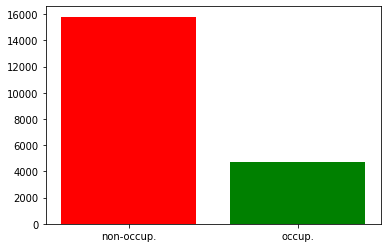

In [10]:
plt.bar(list(k),d.values(),color=['r','g'])
plt.xticks(list(k), ('non-occup.', 'occup.'))
plt.show()

O podemos usar el pie chart (plt.pie) con d.values() como dato, labels=k y colors =['r','g']

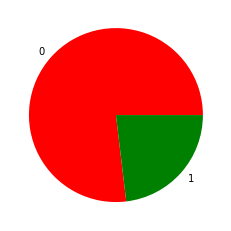

In [11]:
#<---
plt.pie(d.values(),labels=k,colors=['r','g'])
plt.show()

Analizamos los valores __nulos__ o faltantes del dataset usando el método **isnull** y sumando para ver cuántos hay.

In [12]:
occupancy.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

La variable __date__ es de tipo fecha. Como para los modelos necesitamos variables numéricas, para no descartarla, la transformamos en un número. Podemos usar el día de la semana a la que pertenece. 

Primero observemos el tipo de dato de la columna:

In [13]:
print(occupancy['date'].head(3))
occupancy['date'].dtypes

0    2015-02-04 17:51:00
1    2015-02-04 17:51:59
2    2015-02-04 17:53:00
Name: date, dtype: object


dtype('O')

Si bien __date__ representa una fecha, está almacenada como un string. Para poder usar las funciones de fecha necesitamos convertirla a tipo __datetime__. Si hay errores como fechas mal formadas, se pueden evitar con 'coerce'.
[Pandas to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [14]:
occupancy['date']=pd.to_datetime(occupancy['date'],errors='coerce')
occupancy['date']

0       2015-02-04 17:51:00
1       2015-02-04 17:51:59
2       2015-02-04 17:53:00
3       2015-02-04 17:54:00
4       2015-02-04 17:55:00
                ...        
20555   2015-02-04 10:38:59
20556   2015-02-04 10:40:00
20557   2015-02-04 10:40:59
20558   2015-02-04 10:41:59
20559   2015-02-04 10:43:00
Name: date, Length: 20560, dtype: datetime64[ns]

Ahora que la columna es de tipo date podemos aplicar la función __dt.dayofweek__  
[datetime.dayofweek](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html)  
Notar que la función asume que el 0 es el lunes.

In [15]:
occupancy['date']=occupancy['date'].dt.dayofweek
occupancy['date'].head(5)

0    2
1    2
2    2
3    2
4    2
Name: date, dtype: int64

Observamos como se distribuyen los datos de acuerdo a los días de la semana

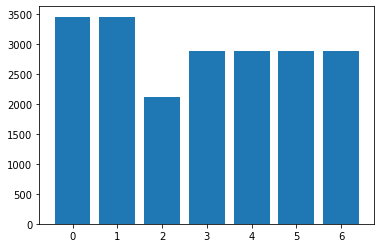

In [16]:
dias=dict(occupancy.groupby('date').size())
plt.bar(dias.keys(),dias.values())
plt.show()

Observamos cómo se distribuyen los datos de acuerdo al día y al valor de occupancy

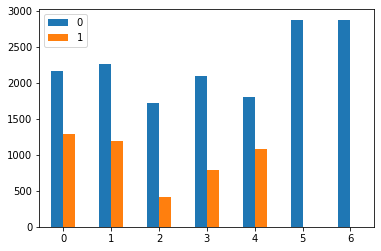

In [17]:
#Obtenemos las observaciones cuyo valor de occupancy es 0
oc0=occupancy[occupancy['Occupancy']==0]
#Obtenemos las observaciones cuyo valor de occupancy es 1
oc1=occupancy[occupancy['Occupancy']==1]
#Agupamos por el día de la semana cada uno de los dataframes
cero=dict(oc0.groupby('date').size())
uno=dict(oc1.groupby('date').size())
#Observar por qué esto dá error
#<---
uno[5]=0
uno[6]=0
#Creamos un dataFrame con los valores agrupados en cada caso
df=pd.DataFrame({'0':cero.values(),'1':uno.values()}, index=uno.keys())
#Ver con la opción stacked=True
df.plot.bar(rot=0)
plt.show()

In [18]:
uno

{0: 1288, 1: 1190, 2: 409, 3: 783, 4: 1080, 5: 0, 6: 0}

Observamos la distribución de las variables numéricas y analizamos la presencia de outliers

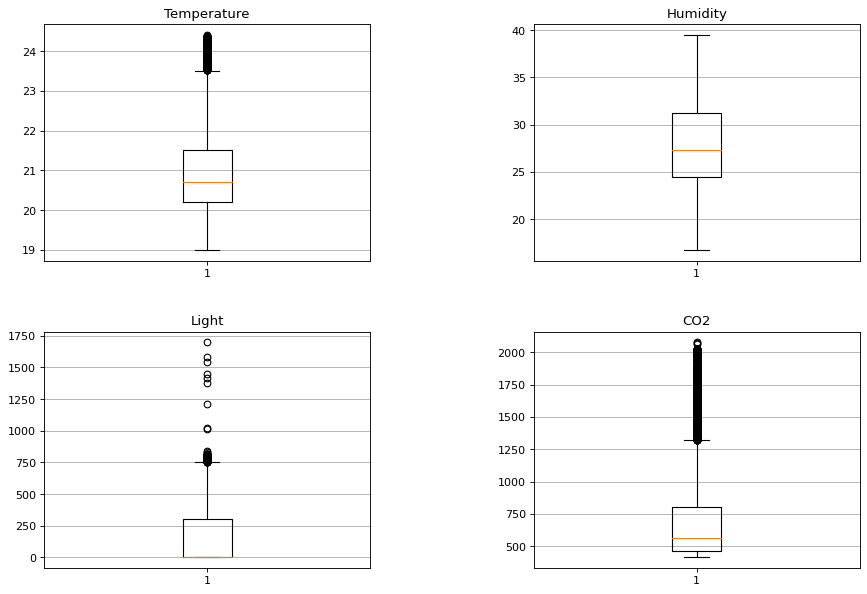

In [19]:
fig=plt.figure(figsize=(12, 8), dpi= 80)
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9,wspace=0.5,hspace=0.3)

for i in range(1,5):
  plt.subplot(2,2,i)
  plt.title(occupancy.columns[i])
  plt.boxplot(occupancy[occupancy.columns[i]])
  plt.grid(axis='y')  
plt.show()

Calculamos el límite superior de Temperature para saber a partir de que valor se consideran outliers.

In [20]:
ot= occupancy['Temperature'].quantile(0.75) + 1.5*(occupancy['Temperature'].quantile(0.75)-
                                                   occupancy['Temperature'].quantile(0.25))
ot

23.512499999999996

Vamos a crear otro dataset pero que no tenga outliers. Copiamos occupancy a oso (occupancy sin outliers)

In [21]:
oso=occupancy.copy()
oso.loc[oso['Temperature']>ot,'Temperature']=ot

In [22]:
oso['Temperature'].max()

23.512499999999996

Generalizamos este procedimiento para el resto de las variables con outliers.

In [23]:
def sacar_outliers(oso,v):
  o= occupancy[v].quantile(0.75) + 1.5*(occupancy[v].quantile(0.75)-
                                                   occupancy[v].quantile(0.25))
  oso.loc[oso[v]>o,v]=o
  return oso



In [24]:
lista=['Light','CO2']
for l in lista:
  oso=sacar_outliers(oso,l)

oso['CO2'].max()

1321.6666666666674

Observamos en los boxplots la distribución luego de la modificación.

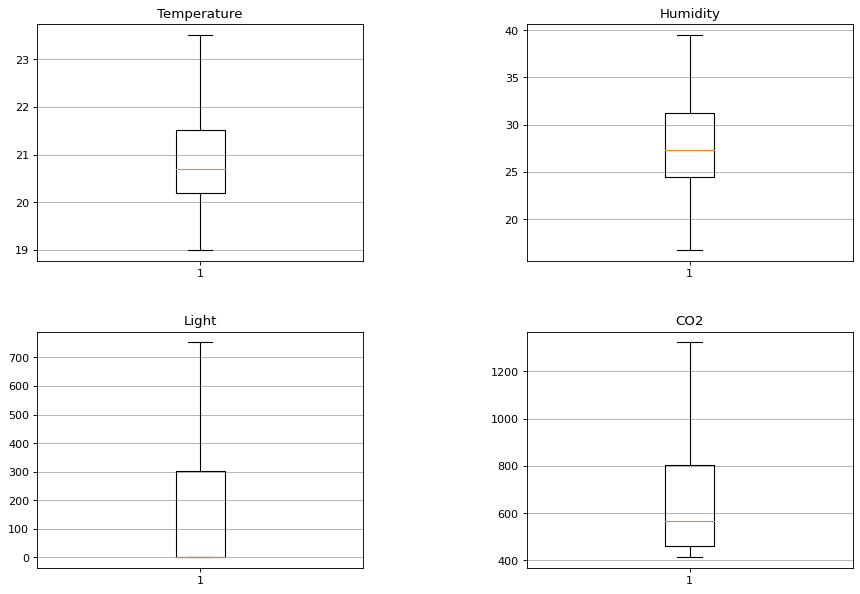

In [25]:
fig=plt.figure(figsize=(12, 8), dpi= 80)
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9,wspace=0.5,hspace=0.3)

#<-
for i in range(1,5):
  plt.subplot(2,2,i)
  plt.title(oso.columns[i])
  plt.boxplot(oso[oso.columns[i]])
  plt.grid(axis='y')  
plt.show()

## Comenzamos con el árbol
Pero primero separamos el conjunto de features del target. __X__ <- variables __y__ <- target

In [26]:
y=occupancy['Occupancy']
X=occupancy.drop(['Occupancy'],axis=1)

Dividimos el conjunto en entrenamiento y prueba (30\%) usando la función <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a>.

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Al principio, importamos la librería __tree__ de __sklearn__ y vamos a usar el árbol para clasificar.
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">Documentación de la librería: DecisionTreeClassifier</a>
<ol>
<li>Creo el modelo</li>
<li>Lo ajusto con el conjunto de entrenamiento</li>
<li>Graficamos</li>
<li>Para conocer su rendimiento observamos Accuracy y Matriz de Confusión</li>
</ol>

In [28]:
# Usamos la librería tree de sklearn para crear el modelo
model = tree.DecisionTreeClassifier(max_depth=4)
model

DecisionTreeClassifier(max_depth=4)

In [29]:
#Ajustamos el modelo con nuestros datos
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

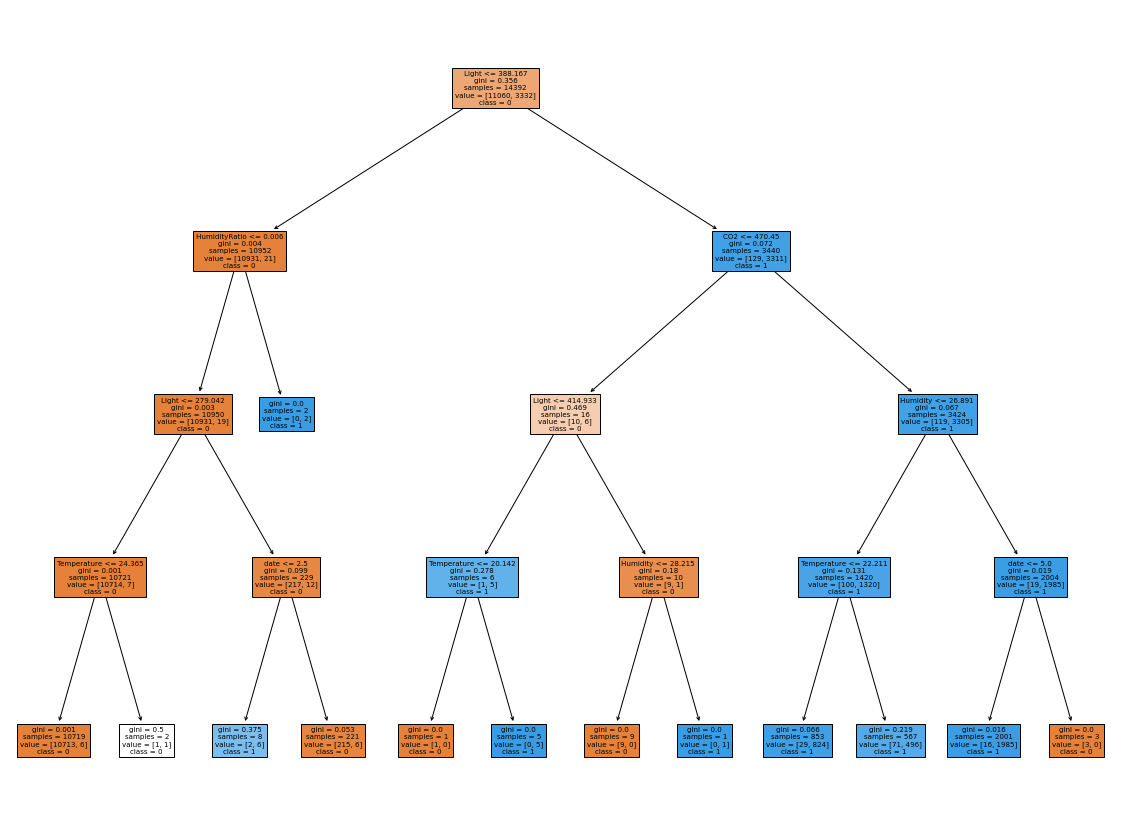

In [30]:
#Creamos un espacio más grande para graficar el árbol
fig,ax1 = plt.subplots(1,1,figsize=(20,15))

tree.plot_tree(model,ax=ax1, max_depth=4, feature_names=X.columns, class_names=['0','1'],filled=True)
plt.show()

Probamos el model con los datos para test

In [31]:
yPred=model.predict(X_test)
yPred

array([1, 0, 0, ..., 1, 0, 1])

In [32]:
#las métricas las importamos al principio: confusion_matrix,accuracy_score,recall_score,precision_score
print('Accuracy Score: ',accuracy_score(y_test, yPred) )
print('Recall Score: ', recall_score(y_test, yPred))
print('Precision Score: ', precision_score(y_test, yPred) )

#confusion Matrix
confusion_matrix(y_test, yPred)

Accuracy Score:  0.9896238651102465
Recall Score:  0.9950634696755994
Precision Score:  0.9611716621253406


array([[4693,   57],
       [   7, 1411]])

Podemos mostrar la matriz un poco más clara y también normalizada

/home/chris/anaconda3/envs/datacamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


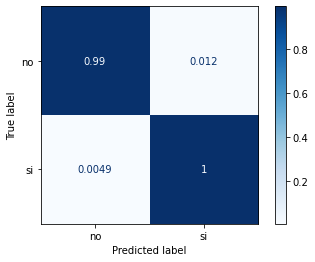

In [33]:
#Al principio importamos plot_confusion_matrix
clases=['no','si']
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,normalize='true',display_labels=clases)
plt.show()

Vamos a evaluar el modelo con Cross Validation. Inicialmente usamos Accuracy como métrica pero podemos usar muchas otras, inclusive podemos crear nuestras métricas. Esto es especialmente útil cuando hacemos regresión.
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules">Métricas</a>

In [34]:
#función cross_validate importada de sklearn.model_selection
results = cross_validate(model,X,y, cv=10, scoring='recall')
results

{'fit_time': array([0.03966331, 0.03346086, 0.03286529, 0.03081155, 0.02959347,
        0.03164291, 0.03610373, 0.02814698, 0.02939558, 0.03104568]),
 'score_time': array([0.00237489, 0.00369954, 0.00241613, 0.00252986, 0.00257087,
        0.00320172, 0.00322199, 0.00315142, 0.0063765 , 0.00484347]),
 'test_score': array([0.99368421, 0.99789474, 0.90315789, 0.99157895, 0.98315789,
        0.99789474, 0.99789474, 0.99789474, 0.99368421, 1.        ])}

In [35]:
mi_score={'ac':'accuracy','rcl':'recall'}
results = cross_validate(model, X, y, cv=10, scoring=mi_score)
results

{'fit_time': array([0.03667974, 0.03616881, 0.03354812, 0.02868581, 0.02790761,
        0.02844095, 0.03134108, 0.03155351, 0.02843118, 0.02826905]),
 'score_time': array([0.00900412, 0.00377202, 0.00470352, 0.00391912, 0.00487328,
        0.00426388, 0.00587225, 0.00266576, 0.00304651, 0.00353789]),
 'test_ac': array([0.96741245, 0.91001946, 0.97762646, 0.99659533, 0.99027237,
        0.91293774, 0.99416342, 0.99367704, 0.98200389, 0.9844358 ]),
 'test_rcl': array([0.99368421, 0.98315789, 0.90315789, 0.99157895, 0.98315789,
        0.99789474, 0.99789474, 0.99789474, 0.99368421, 1.        ])}

Probamos el modelo cambiando __gini__ por __entropía__. Creamos __model2__ con <code>criterion='entropy'</code>. Vamos a tener que crear __yPred2__ y calcular las métricas con él.

In [36]:
model2 = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
model2

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Creamos yPred2 usando el método predict sobre X_test

In [37]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Observamos los resultados de Accuracy, Recall y Precision más la matriz de confusión.

In [38]:
yPred2=model2.predict(X_test)
yPred2

array([1, 0, 0, ..., 1, 0, 1])

Accuracy Score:  0.9897859922178989
Recall Score:  0.9950634696755994
Precision Score:  0.961826857532379


/home/chris/anaconda3/envs/datacamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


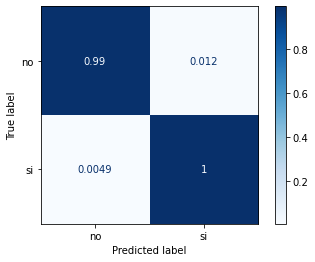

In [39]:
print('Accuracy Score: ',accuracy_score(y_test, yPred2) )
print('Recall Score: ', recall_score(y_test, yPred2))
print('Precision Score: ', precision_score(y_test, yPred2) )
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues,normalize='true',display_labels=clases)
plt.show()

### Sin outliers
Por último, vamos a probar un modelo entrenándolo con datos sin outliers.<br>
1. Creamos X3 e y3 usando en dataset __oso__

In [40]:
y3=oso['Occupancy']
X3=oso.drop(['Occupancy'],axis=1)

2. Dividimos el conjunto en __train__ y __test__ 70-30

In [41]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3,test_size=0.3)

3. Creamos model3 con el clasificador ajustado con los datos sin outliers.

In [42]:
model3 = tree.DecisionTreeClassifier(max_depth=4)
model3.fit(X_train3,y_train3)

DecisionTreeClassifier(max_depth=4)

4. Creamos yPred3 con la predicción del model3 y mostramos las métricas: Accuracy, Recall, Precision, y la matriz de confusión.

In [43]:
yPred3=model.predict(X_test3)
yPred3

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score:  0.9892996108949417
Recall Score:  0.997134670487106
Precision Score:  0.9573590096286108


/home/chris/anaconda3/envs/datacamp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


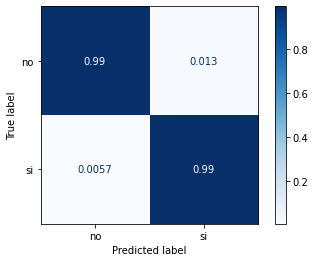

In [44]:
print('Accuracy Score: ',accuracy_score(y_test3, yPred3) )
print('Recall Score: ', recall_score(y_test3, yPred3))
print('Precision Score: ', precision_score(y_test3, yPred3) )
plot_confusion_matrix(model3, X_test3, y_test3, cmap=plt.cm.Blues,normalize='true',display_labels=clases)
plt.show()

## Comparamos los resultados
Creamos un dataFrame con los nombres de los distintos modelos probados y las métricas de cada uno.

In [45]:
accuracy_score(y_test, yPred) 
print('Recall Score: ', recall_score(y_test, yPred))
print('Precision Score: ', precision_score(y_test, yPred) )

Recall Score:  0.9950634696755994
Precision Score:  0.9611716621253406


In [46]:
pd.DataFrame({'model1':[accuracy_score(y_test, yPred),recall_score(y_test, yPred),precision_score(y_test, yPred)],
 'model2':[accuracy_score(y_test, yPred2),recall_score(y_test, yPred2),precision_score(y_test, yPred2)],
 'model3':[accuracy_score(y_test3, yPred3),recall_score(y_test3, yPred3),precision_score(y_test3, yPred3)]},index=['Accuracy','Recall','Precision'])

,model1,model2,model3
Accuracy,0.989624,0.989786,0.989300
Recall,0.995063,0.995063,0.997135
Precision,0.961172,0.961827,0.957359
